<a href="https://colab.research.google.com/github/gmauricio-toledo/numerical-methods/blob/master/EDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git init
!git pull https://github.com/gmauricio-toledo/numerical-methods.git 

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 137, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 137 (delta 64), reused 57 (delta 17), pack-reused 0
Receiving objects: 100% (137/137), 1.41 MiB | 20.90 MiB/s, done.
Resolving deltas: 100% (64/64), done.
From https://github.com/gmauricio-toledo/numerical-methods
 * branch            HEAD       -> FETCH_HEAD


In [32]:
f = lambda x: -2*x**3 + 12*x**2 - 20*x + 8.5

sol = lambda x:-0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1

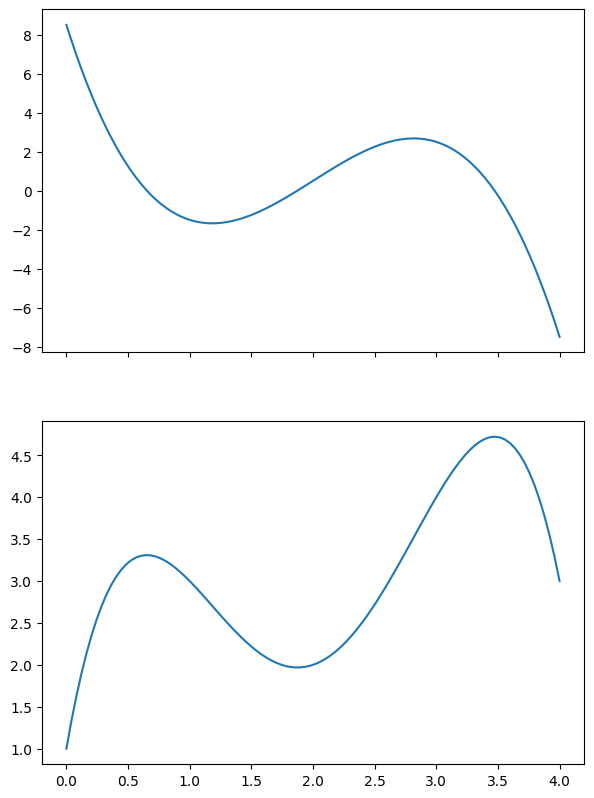

In [31]:
import matplotlib.pyplot as plt
import numpy as np

xs = np.linspace(0,4,100)

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True,figsize=(7,10),dpi=100)
ax1.plot(xs,[f(x) for x in xs])
ax2.plot(xs,[sol(x) for x in xs])
fig.show()

Implementación *stand-alone*

In [ ]:
import numpy as np

a = 0
b = 4

h = 0.5

x0 = 0
y0 = 1

n = int((b-a)/h)

xs = np.linspace(a,b,n+1)
ys = np.zeros_like(xs)

ys[0] = y0
for j in range(1,n+1):
    ys[j] = ys[j-1] + f(xs[j-1])*h

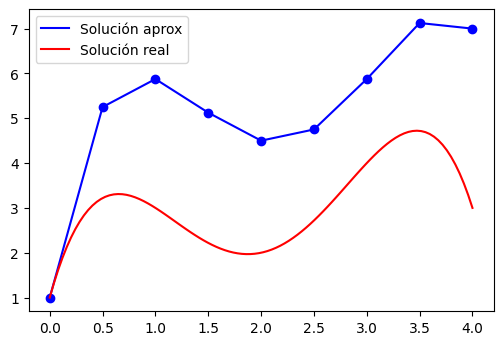

In [ ]:
import matplotlib.pyplot as plt

xaxis = np.linspace(a,b,100)

plt.figure(dpi=100)
plt.plot(xs,ys,color='blue',label='Solución aprox')
plt.scatter(xs,ys,color='blue')
plt.plot(xaxis,[sol(x) for x in xaxis],color='red',label='Solución real')
plt.legend(loc='best')
plt.show()

Como clase

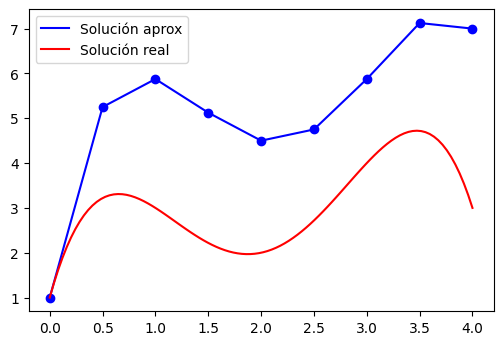

In [2]:
from edo import EulerEDO

f = lambda x,y: -2*x**3 + 12*x**2 - 20*x + 8.5
sol = lambda x:-0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1

a = 0
b = 4
h = 0.5
x0 = 0
y0 = 1

solver = EulerEDO(f,sol)
solver.fit(a,b,h,x0,y0,heun=False)
solver.plot(plot_nodes=True)

In [4]:
from edo import print_table

valores_reales = sol(solver.xs)
errores_relativos = (sol(solver.xs) - solver.ys)/sol(solver.xs)

print_table(solver.xs,solver.ys,valores_reales,errores_relativos)


x	y	y real	error rel
0.0	1.0	1.0	0.0
0.5	5.25	3.219	-0.631
1.0	5.875	3.0	-0.958
1.5	5.125	2.219	-1.31
2.0	4.5	2.0	-1.25
2.5	4.75	2.719	-0.747
3.0	5.875	4.0	-0.469
3.5	7.125	4.719	-0.51
4.0	7.0	3.0	-1.333


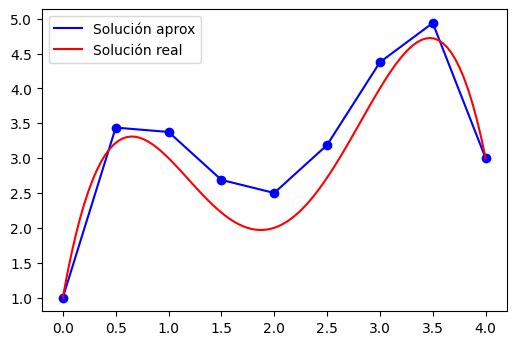

In [6]:
from edo import EulerEDO

f = lambda x,y: -2*x**3 + 12*x**2 - 20*x + 8.5
sol = lambda x:-0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1

a = 0
b = 4
h = 0.5
x0 = 0
y0 = 1

solver = EulerEDO(f,sol)
solver.fit(a,b,h,x0,y0,heun=True)
solver.plot(plot_nodes=True)

In [7]:
valores_reales = sol(solver.xs)
errores_relativos = (sol(solver.xs) - solver.ys)/sol(solver.xs)

print_table(solver.xs,solver.ys,valores_reales,errores_relativos)

x	y	y real	error rel
0.0	1.0	1.0	0.0
0.5	3.438	3.219	-0.068
1.0	3.375	3.0	-0.125
1.5	2.688	2.219	-0.211
2.0	2.5	2.0	-0.25
2.5	3.188	2.719	-0.172
3.0	4.375	4.0	-0.094
3.5	4.938	4.719	-0.046
4.0	3.0	3.0	0.0


# Ejemplo con función que depende de x y y

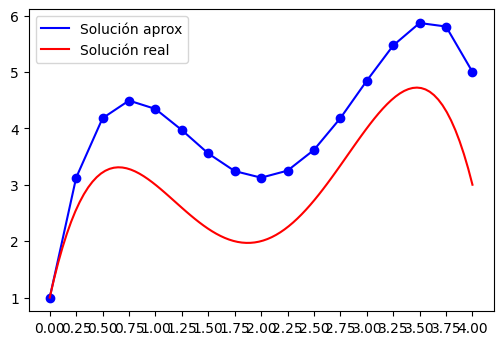

x	y	y real	error rel
0.0	1.0	1.0	0.0
0.25	3.125	2.561	-0.22
0.5	4.18	3.219	-0.299
0.75	4.492	3.279	-0.37
1.0	4.344	3.0	-0.448
1.25	3.969	2.592	-0.531
1.5	3.555	2.219	-0.602
1.75	3.242	1.998	-0.623
2.0	3.125	2.0	-0.562
2.25	3.25	2.248	-0.446
2.5	3.617	2.719	-0.33
2.75	4.18	3.342	-0.251
3.0	4.844	4.0	-0.211
3.25	5.469	4.529	-0.207
3.5	5.867	4.719	-0.243
3.75	5.805	4.311	-0.347
4.0	5.0	3.0	-0.667


In [9]:
from edo import EulerEDO, load_example

example = load_example(1)

a = example['a']
b = example['b']
h = example['h']
f = example['f']
sol = example['sol']
x0 = example['x0']
y0 = example['y0']                    

solver = EulerEDO(f,sol=sol)
solver.fit(a,b,h,x0,y0,method='Euler')
solver.plot(plot_nodes=True)
solver.table()

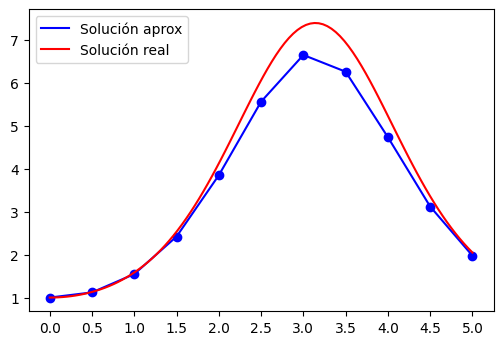

x	y	y real	error rel
0.0	1.0	1.0	0.0
0.5	1.12	1.13	0.009
1.0	1.546	1.584	0.024
1.5	2.419	2.533	0.045
2.0	3.847	4.121	0.067
2.5	5.558	6.057	0.082
3.0	6.645	7.315	0.092
3.5	6.255	6.934	0.098
4.0	4.731	5.226	0.095
4.5	3.117	3.356	0.071
5.0	1.973	2.047	0.036


In [31]:
from edo import EulerEDO

solver = EulerEDO(f,sol=sol)
solver.fit(a,b,h,x0,y0,method='Heun')
solver.plot(plot_nodes=True)
solver.table()

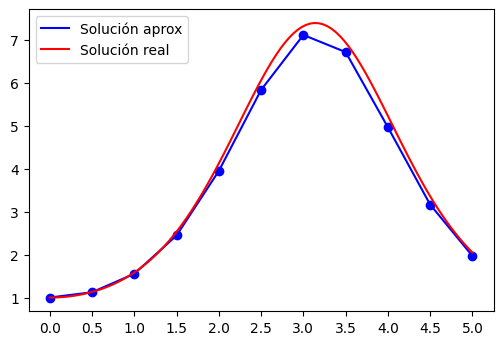

x	y	y real	error rel
0.0	1.0	1.0	0.0
0.5	1.124	1.13	0.006
1.0	1.553	1.584	0.02
1.5	2.444	2.533	0.035
2.0	3.947	4.121	0.042
2.5	5.831	6.057	0.037
3.0	7.11	7.315	0.028
3.5	6.712	6.934	0.032
4.0	4.962	5.226	0.05
4.5	3.162	3.356	0.058
5.0	1.968	2.047	0.039


In [32]:
from edo import EulerEDO

solver = EulerEDO(f,sol=sol)
solver.fit(a,b,h,x0,y0,method='Mid')
solver.plot(plot_nodes=True)
solver.table()

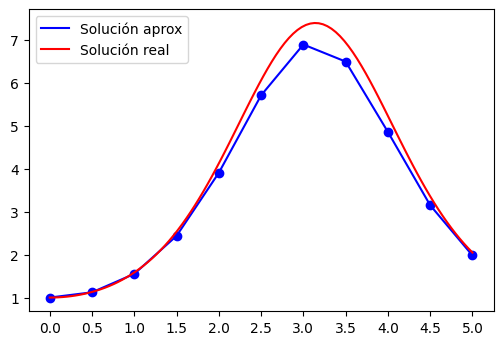

x	y	y real	error rel
0.0	1.0	1.0	0.0
0.5	1.122	1.13	0.007
1.0	1.55	1.584	0.021
1.5	2.435	2.533	0.039
2.0	3.904	4.121	0.053
2.5	5.706	6.057	0.058
3.0	6.888	7.315	0.058
3.5	6.491	6.934	0.064
4.0	4.854	5.226	0.071
4.5	3.148	3.356	0.062
5.0	1.979	2.047	0.033


In [6]:
from edo import RungeKutta2

solver = RungeKutta2(f=f,sol=sol,a2=2/3)
solver.fit(a,b,h,x0,y0)
solver.plot(plot_nodes=True)
solver.table()

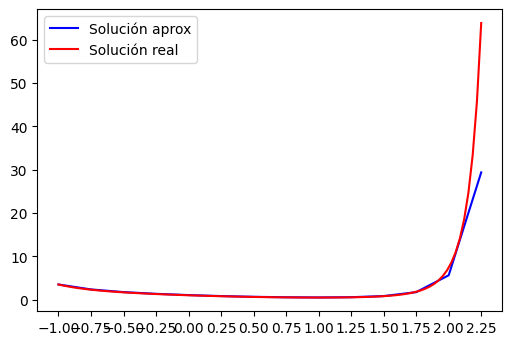

x	y	y real	error rel
-1.0	3.49	3.49	0.0
-0.75	2.35	2.291	-0.026
-0.5	1.733	1.675	-0.035
-0.25	1.336	1.285	-0.039
0.0	1.042	1.0	-0.042
0.25	0.815	0.78	-0.046
0.5	0.647	0.616	-0.05
0.75	0.539	0.511	-0.054
1.0	0.499	0.472	-0.056
1.25	0.555	0.527	-0.052
1.5	0.814	0.791	-0.029
1.75	1.721	1.813	0.051
2.0	5.616	7.389	0.24
2.25	29.386	63.894	0.54
Máximo error relativo 0.5400868333694254


In [1]:
from edo import RungeKutta2, load_example
import numpy as np

example = load_example(4)

a = example['a']
b = example['b']
h = example['h']

solver = RungeKutta2(f=example['f'],
                    sol=example['sol'],
                    a2=2/3)
solver.fit(a,b,h,
            example['x0'],
            example['y0'])
solver.plot(plot_nodes=False)
solver.table()

ers = solver.ers
print(f"Máximo error relativo {np.max(np.abs(ers))}")

[0,4], h=1e-06


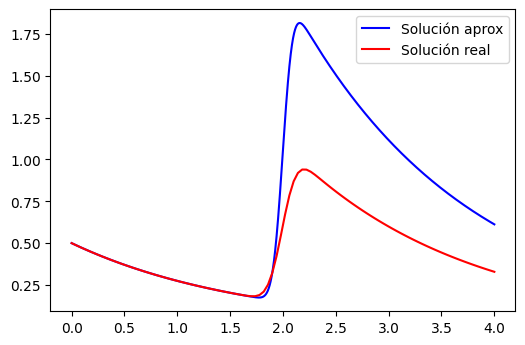

In [5]:
from edo import RungeKutta, load_example
import numpy as np

example = load_example(6)

a = example['a']
b = example['b']
h = 0.000001 # example['h']
print(f"[{a},{b}], h={h}")

solver = RungeKutta(f=example['f'],
                    sol=example['sol'],
                    order=4)
solver.fit(a,b,h,
            example['x0'],
            example['y0'])
solver.plot(plot_nodes=False)
# solver.table()

# ers = solver.ers
# print(f"Máximo error relativo {np.max(np.abs(ers))}")

[0,4], h=0.25


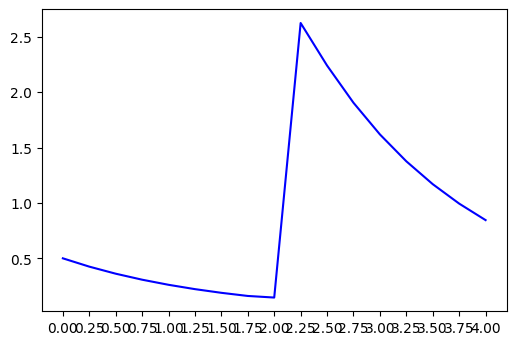

No hay una solución real


In [3]:
from edo import RungeKutta2, load_example
import numpy as np

example = load_example(6)

a = example['a']
b = example['b']
h = example['h']
print(f"[{a},{b}], h={h}")

solver = RungeKutta2(f=example['f'],
                    sol=example['sol'],
                    a2=0)
solver.fit(a,b,h,
            example['x0'],
            example['y0'])
solver.plot(plot_nodes=False)
solver.table()

# ers = solver.ers
# print(f"Máximo error relativo {np.max(np.abs(ers))}")